In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import numpy as np
import math

In [2]:
def load_test(file):
    folder = file[:-4]
    config_file = f"./{folder}/config.json"   
    with open(config_file) as ff:
        c = json.load(ff)
    
    df = pd.read_csv(file)

    return (df,c)

In [3]:
def plot_test(test, ROWS=None, COLS=None, idx=None):
    df, c = test
    last_agg_time = 0
    last_cl_retr = {}
    late_commits = []
    
    for tt, t in enumerate(c['timeline']):
        for action in t:
            cmd = action[0]
            client = action[1]
            if cmd == "RETR":
                last_cl_retr[client] = tt

            if cmd == "AGG":
                last_agg_time = tt

            if cmd == "COMM" and client in last_cl_retr and last_cl_retr[client] < last_agg_time:
                if not math.ceil(tt / 2) in late_commits:
                    late_commits.append(math.ceil(tt / 2))

    hdf = df[df['round'].isin(late_commits)]

    if ROWS is not None and COLS is not None:
        plt.subplot(ROWS, COLS, idx)
    
    plt.title(c['name'])
    plt.plot(df['round'], df['accuracy'])
    plt.scatter(hdf['round'], hdf['accuracy'], color='red')
    plt.subplots_adjust(hspace=0.6) 

    

In [5]:
models_folders = os.listdir('./t4/')
models_folders = [f for f in models_folders if os.path.isdir('./t4/' + f) and not f.startswith(".")]

models = {}

for fold in models_folders:
    data_files = os.listdir(f"./t4/{fold}/")
    data_files = [f for f in data_files if f.endswith(".csv")]
    models[fold] = data_files



In [55]:
def analize(folder, model, csv):
    reference = [f for f in csv if f.startswith("reference") or f.startswith("A-")]
    assert len(reference) == 1
    reference = reference[0]
    others = [f for f in csv if f != reference]

    RDF, RCONF = load_test(f"./{folder}/{reference}")
    
    for i, f in enumerate(others):
        df, c = load_test(f"./{folder}/{f}")
        rdf = RDF.copy()

        c['name'] = f"{model} - {c['name']}"
    
        plt.figure(figsize=(25, 4))
        
        plot_test((rdf[rdf['round'] > 3], RCONF), 1, 3, 1)
        plot_test((df[df['round'] > 3], c), 1, 3, 1)
        
        df['accuracy'] = rdf['accuracy'] - df['accuracy']
        rdf['accuracy'] = 0


        plot_test((rdf, RCONF), 1, 3, 2)
        plot_test((df, c), 1, 3, 2)
        plt.ylim(-0.01, 0.03)
       
        plot_test((rdf[rdf['round'] > 3], RCONF), 1, 3, 3)
        plot_test((df[df['round'] > 3], c), 1, 3, 3)
        
        
        plt.show()

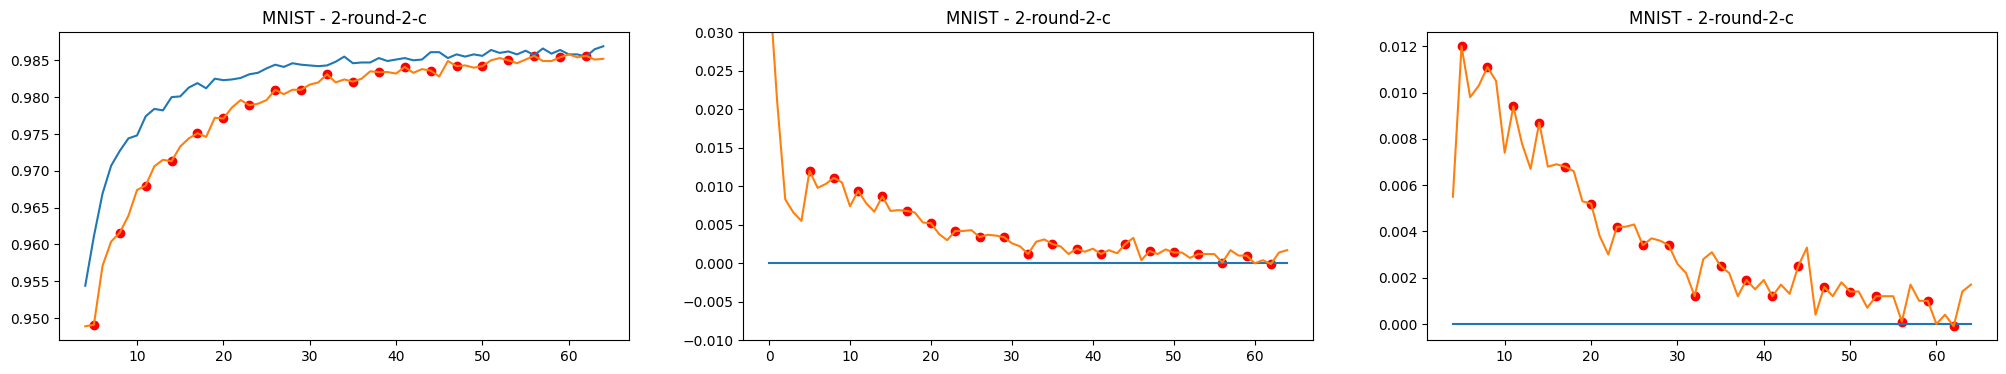

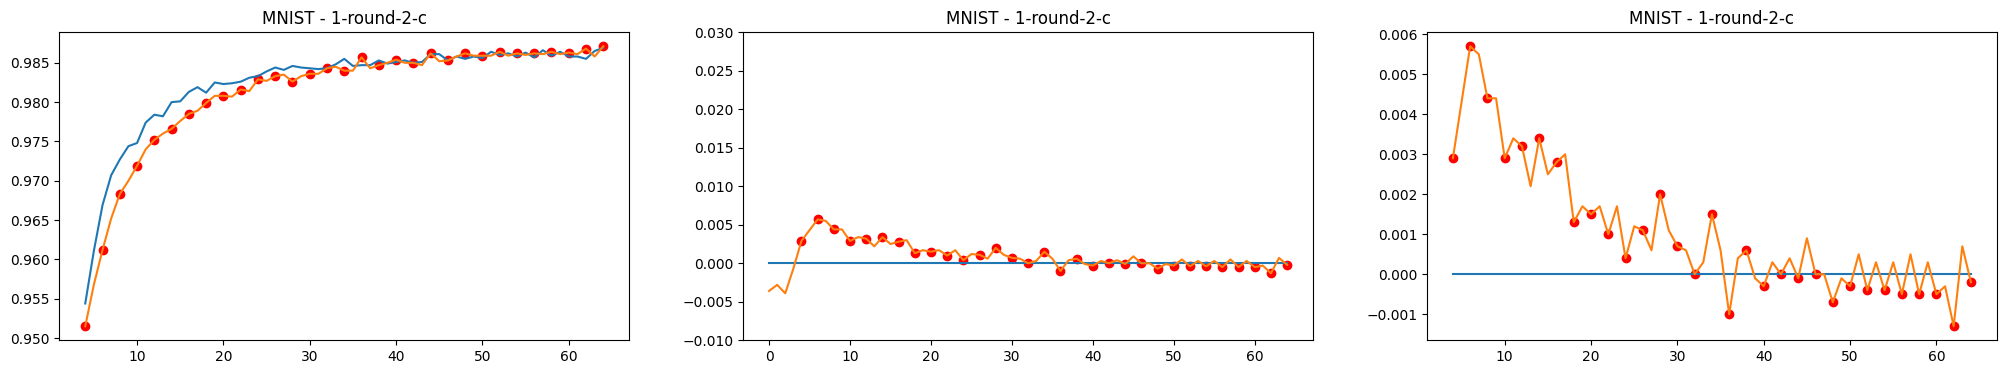

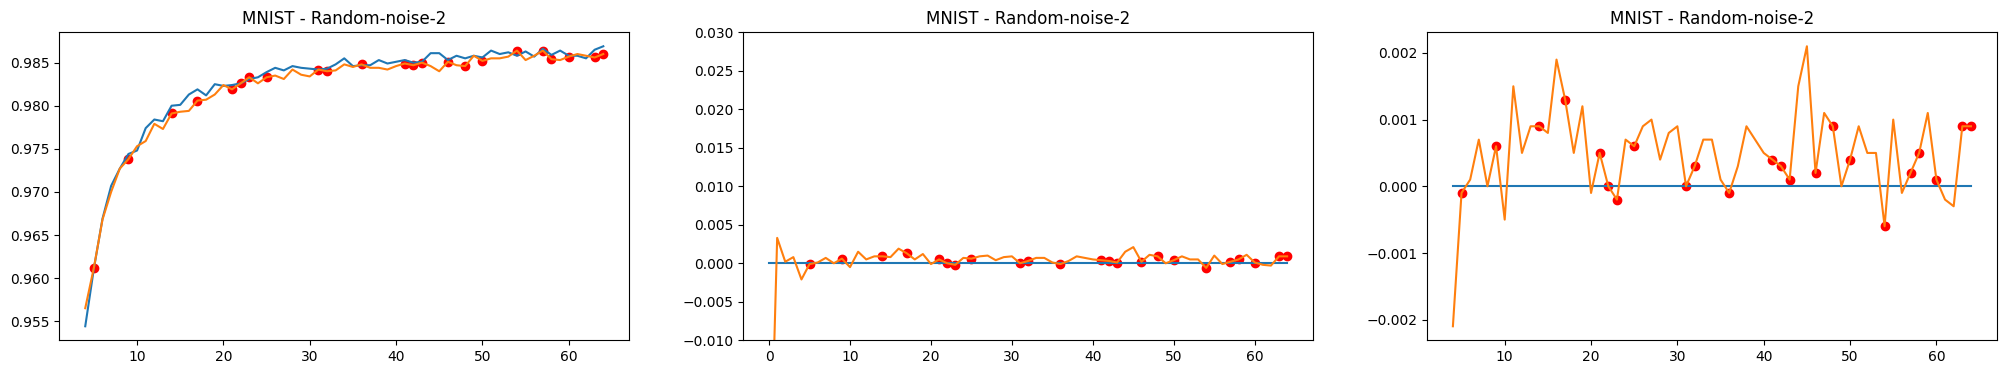

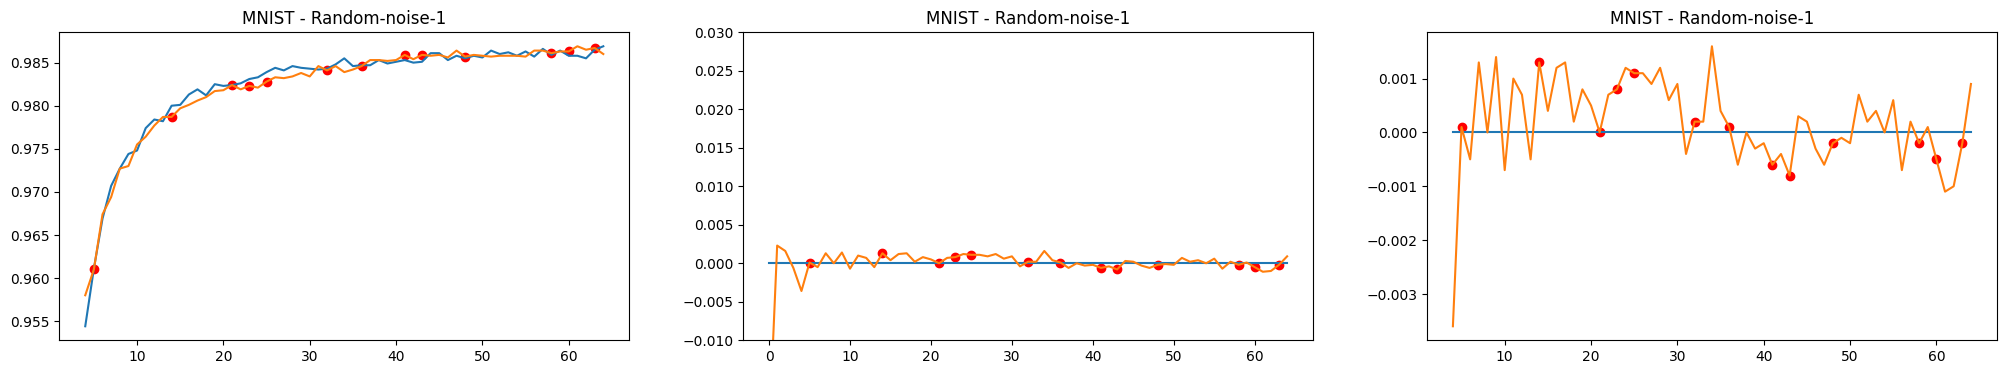

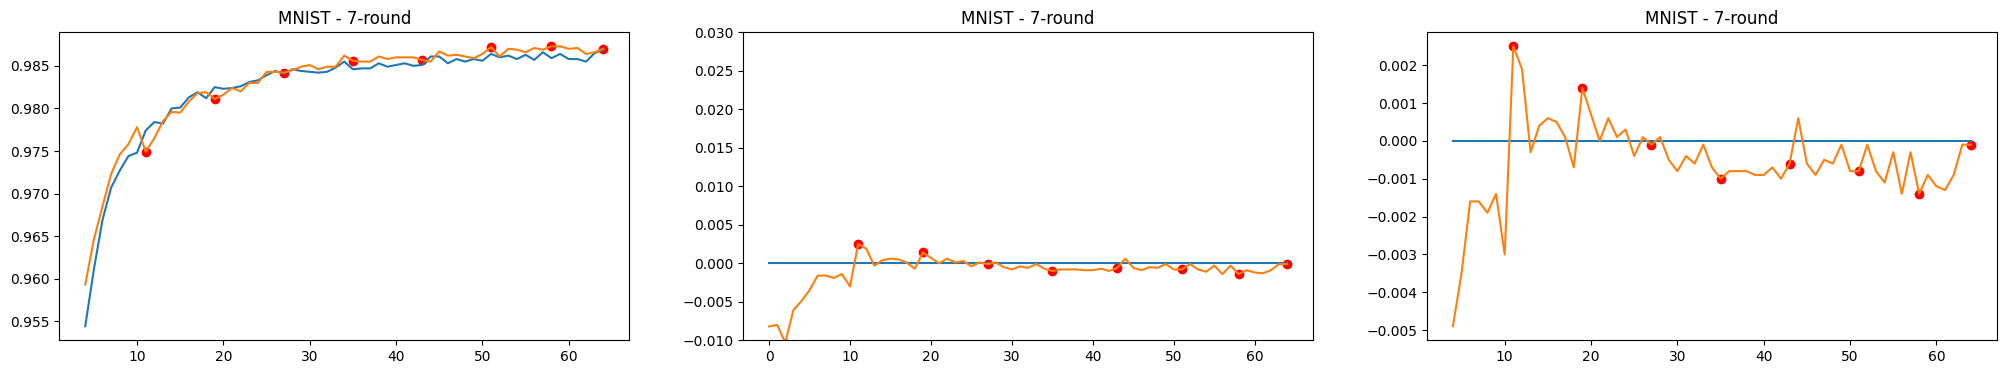

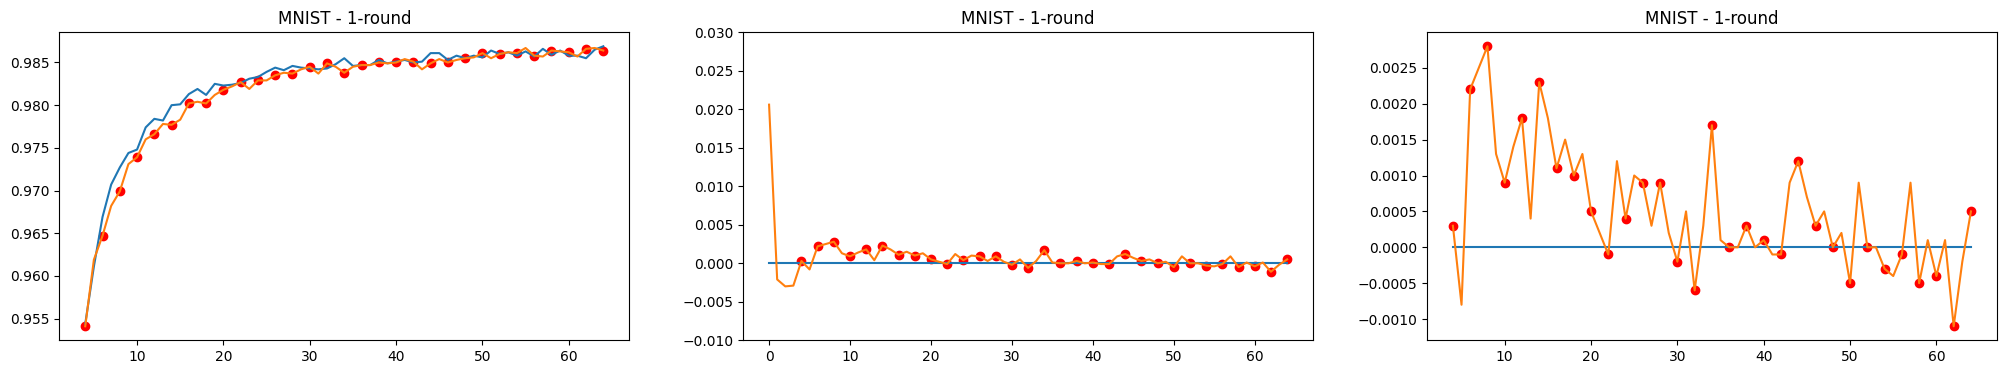

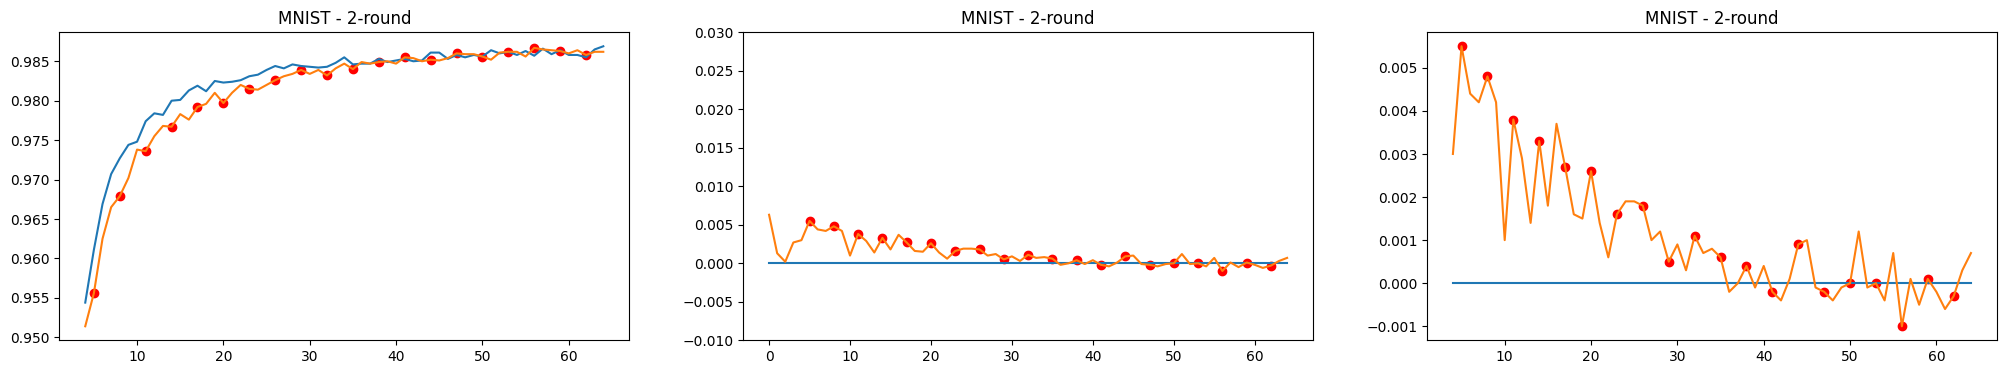

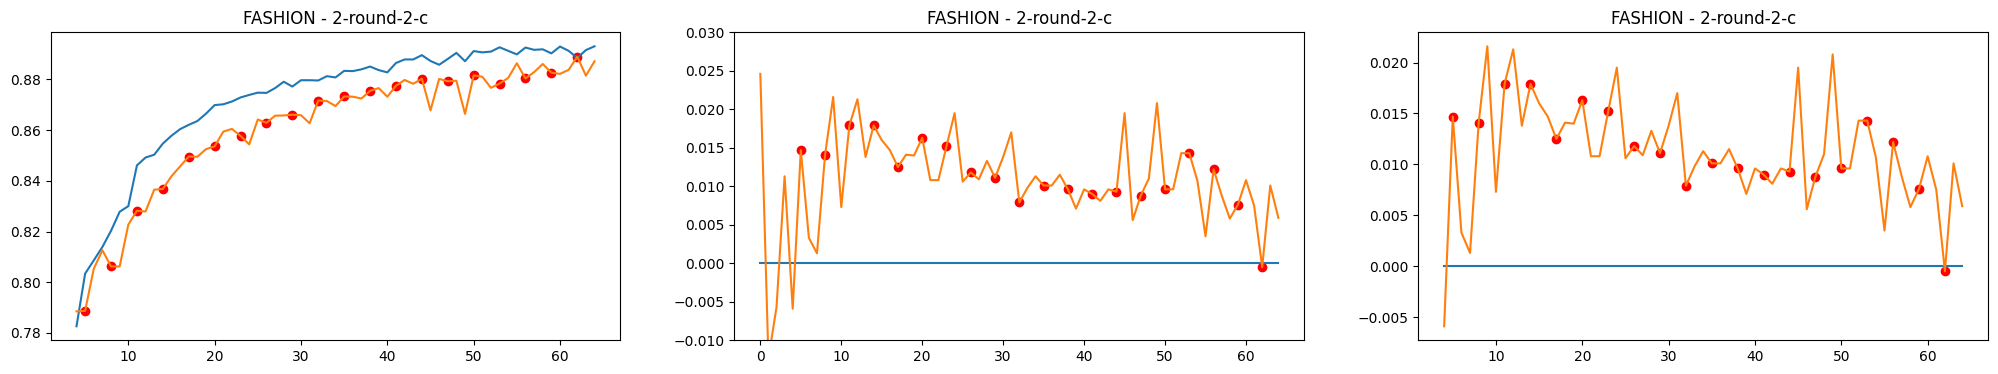

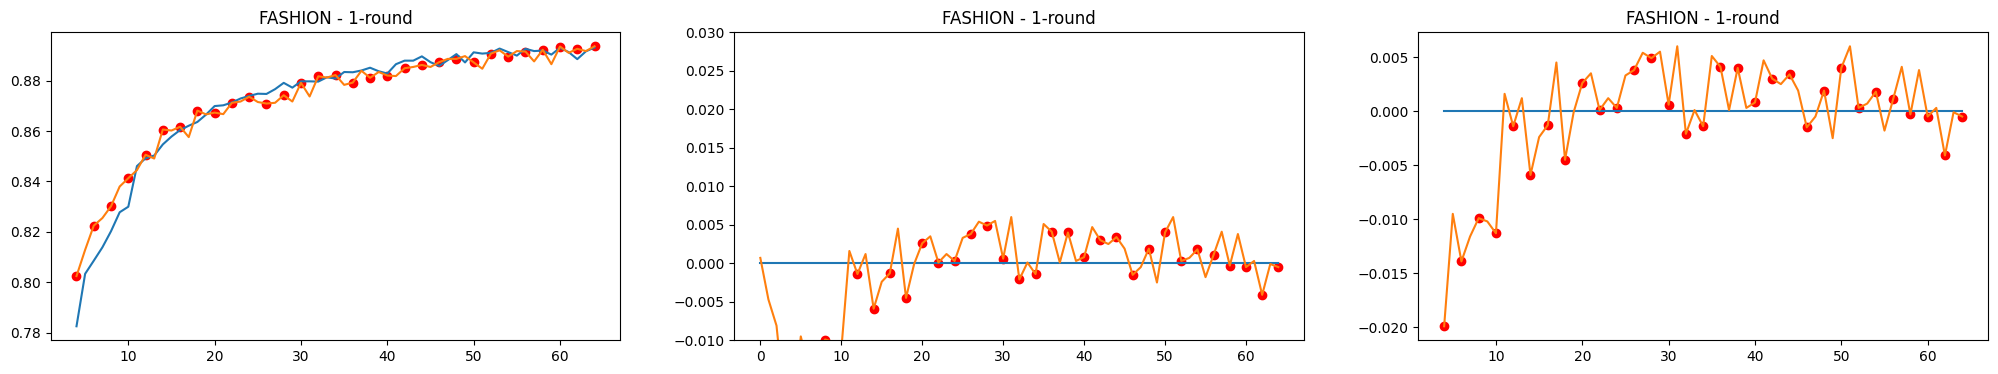

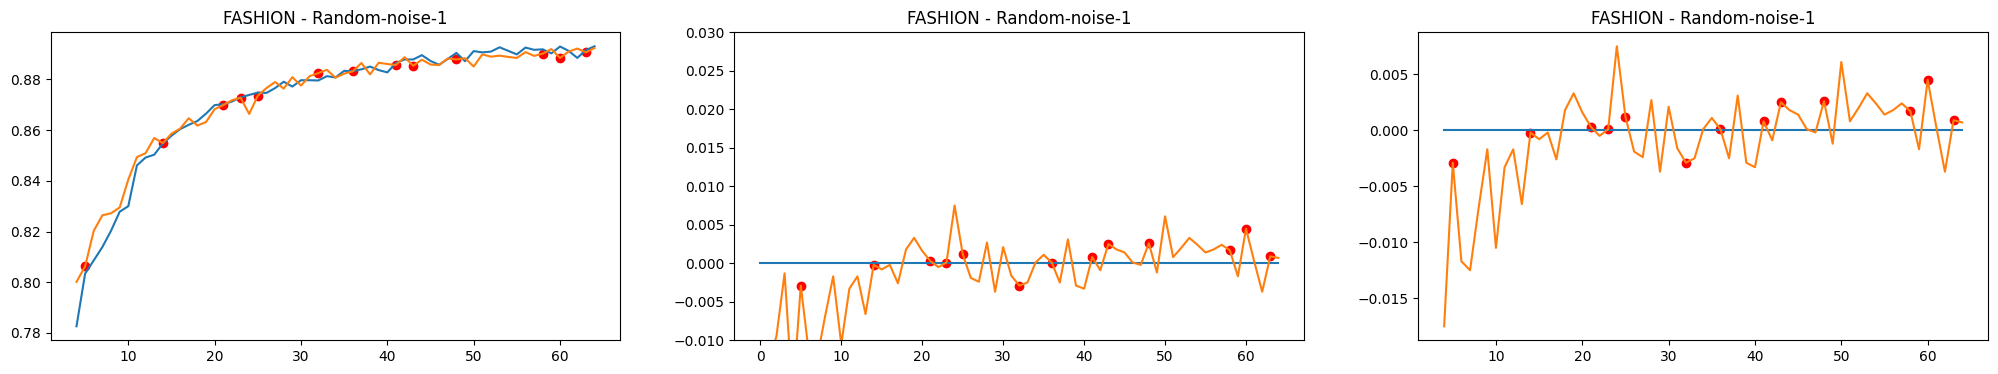

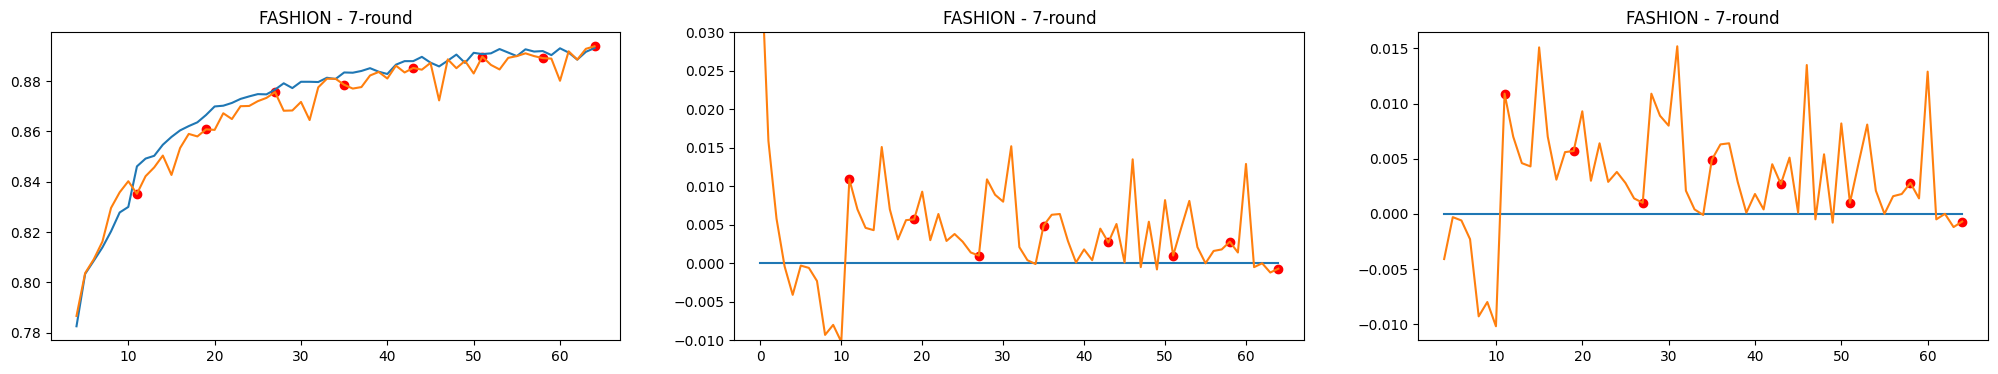

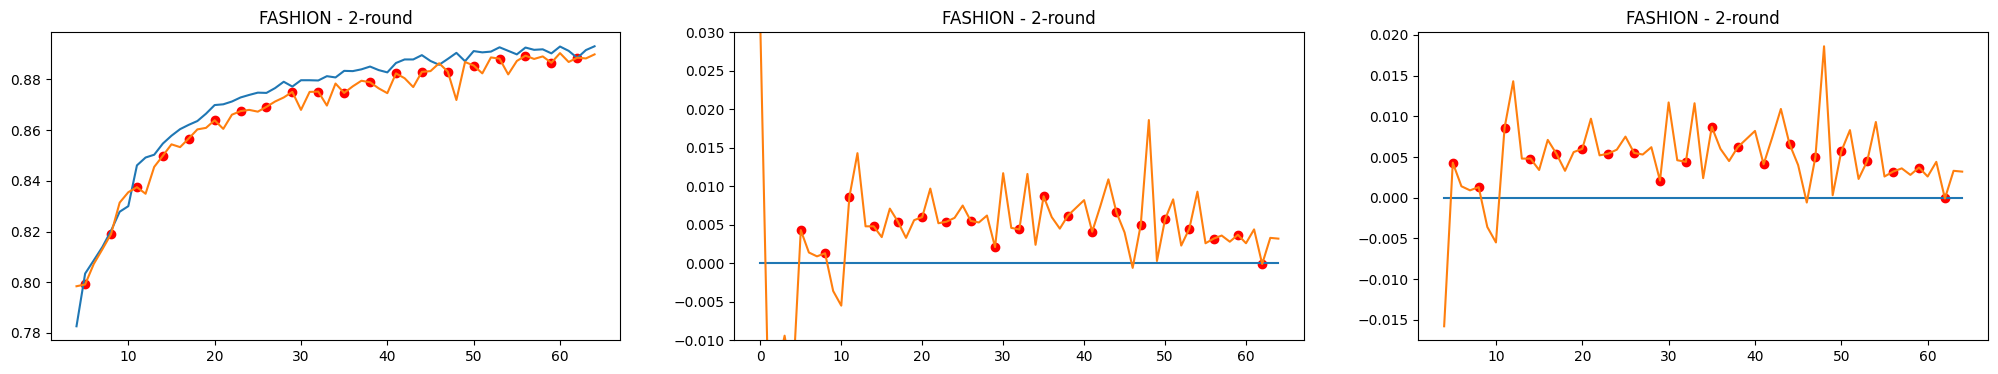

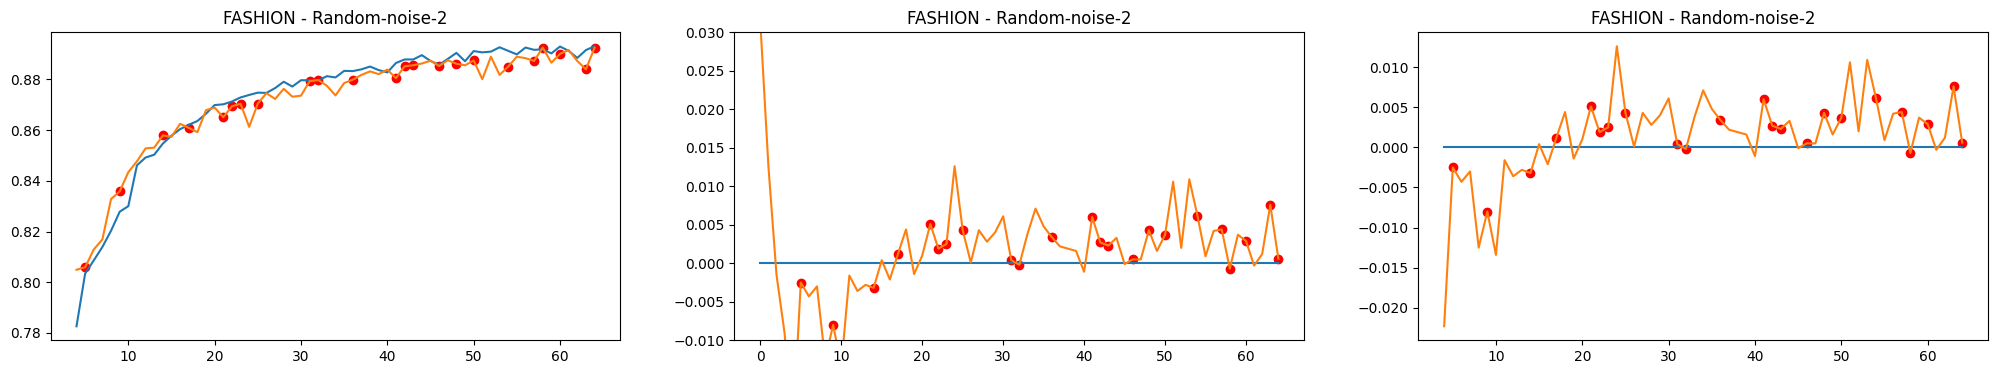

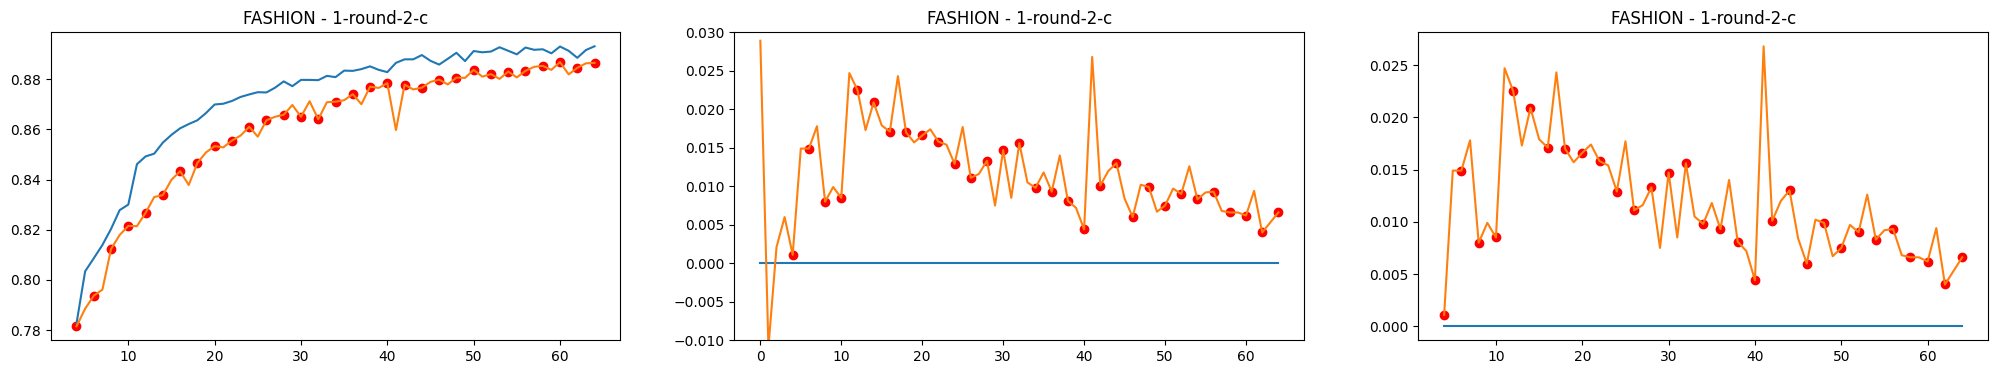

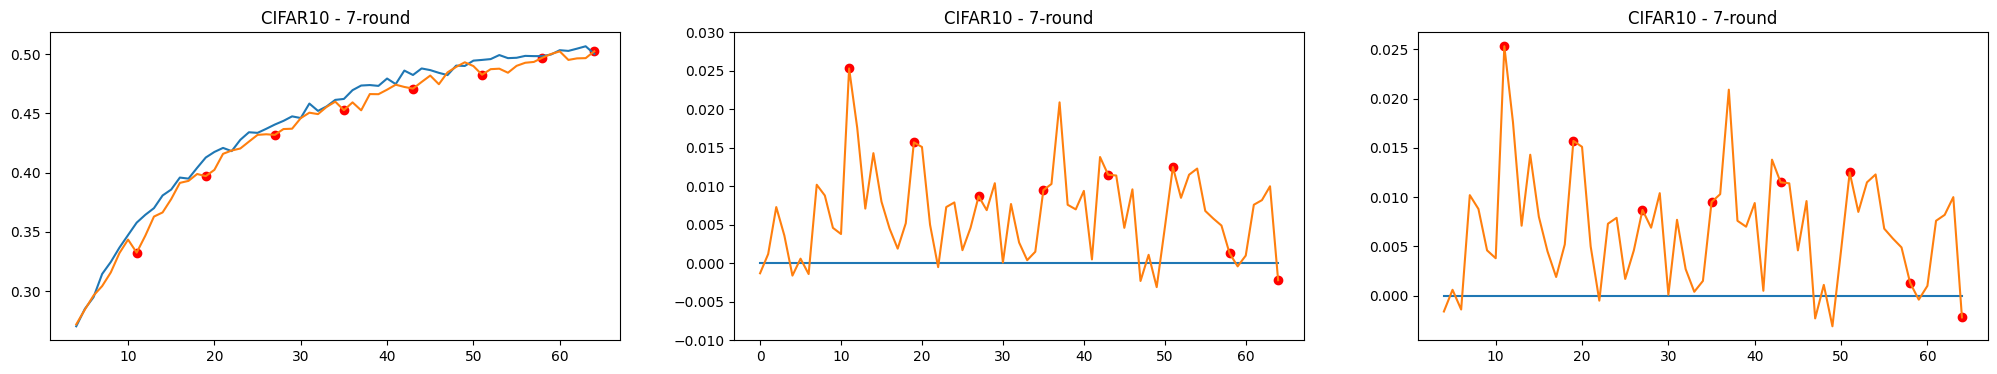

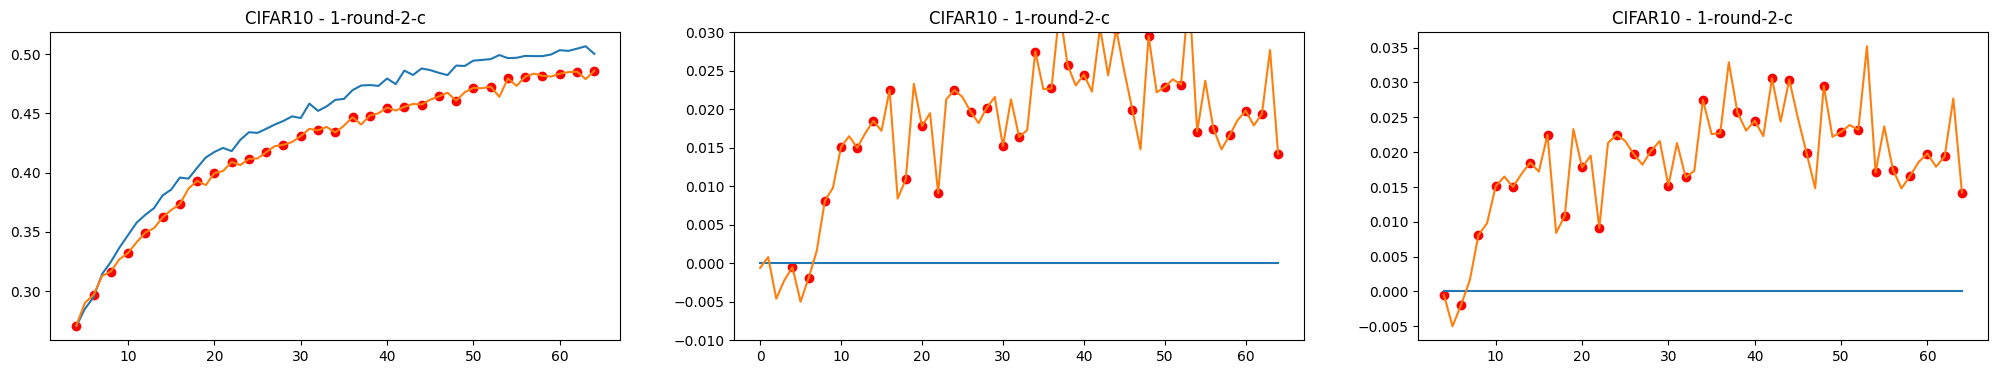

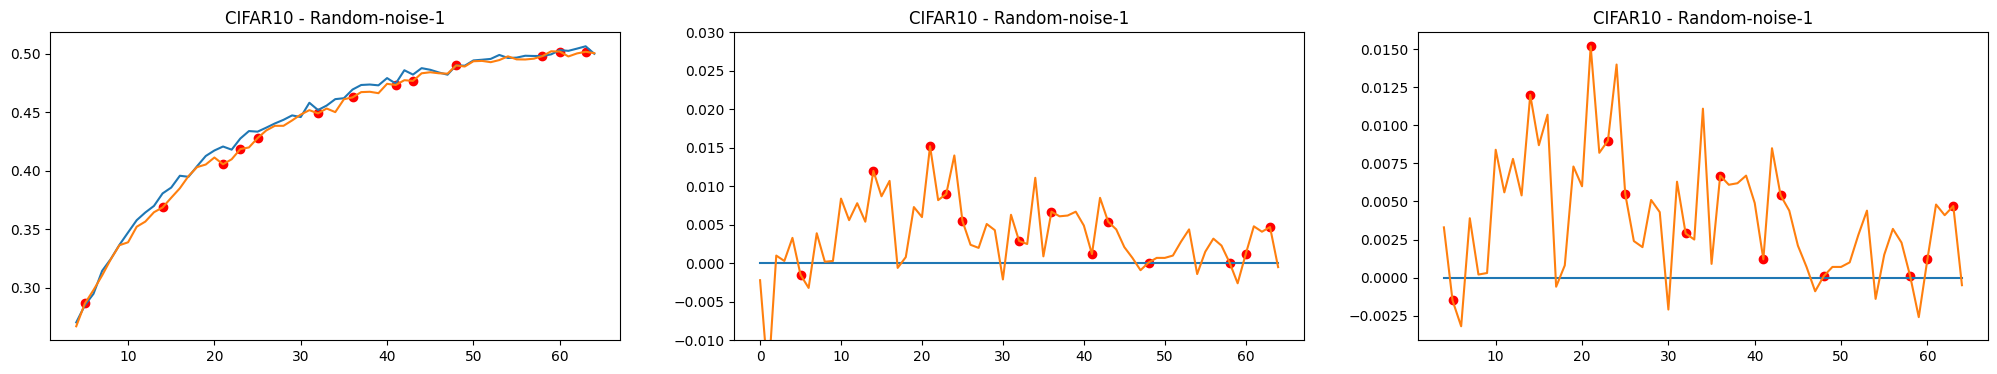

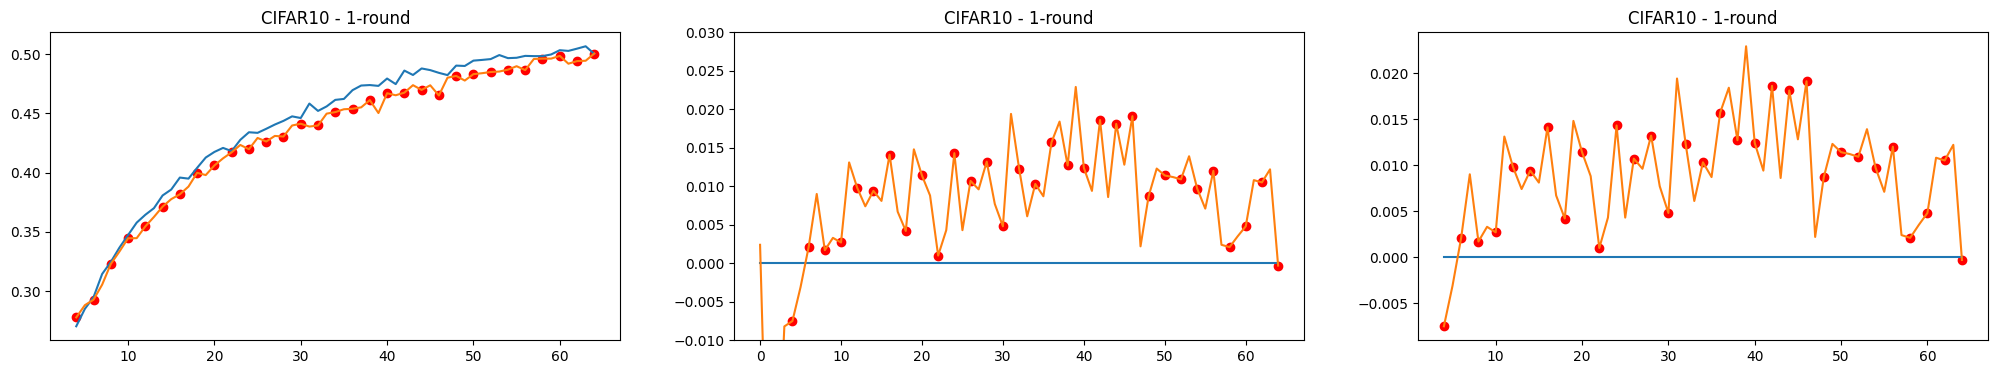

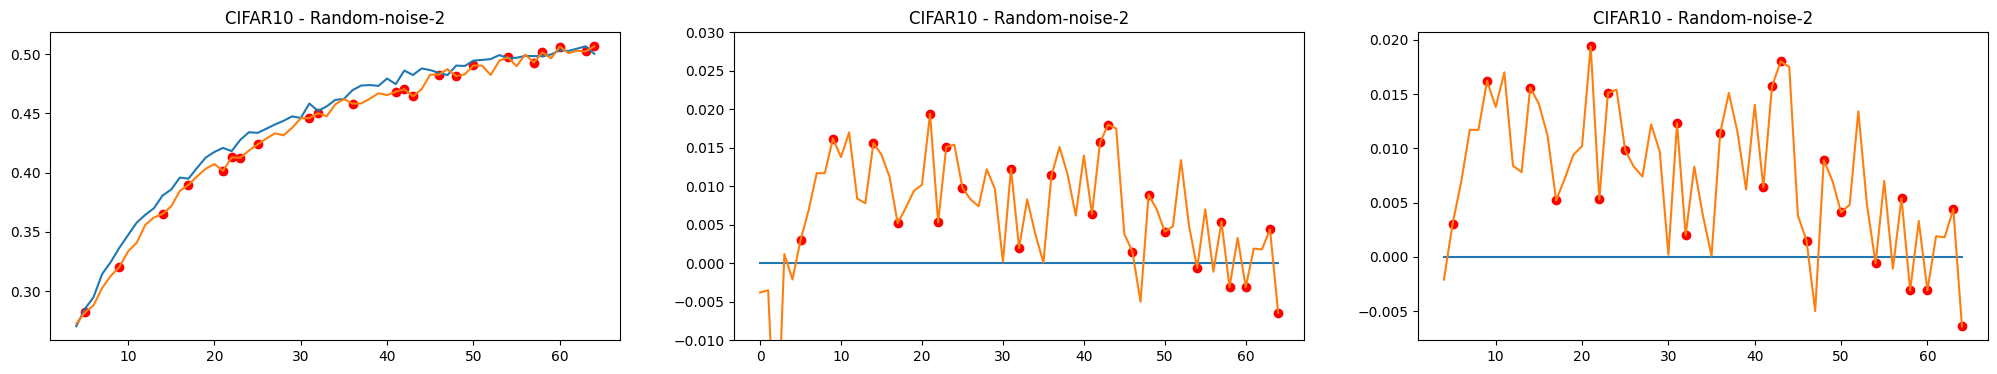

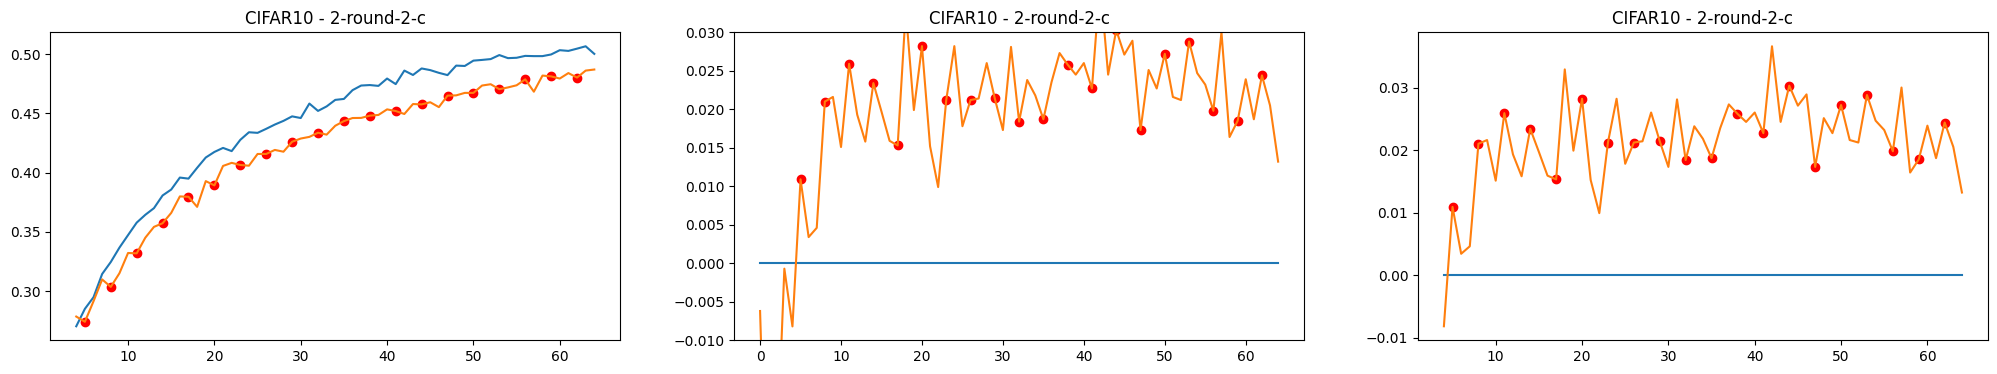

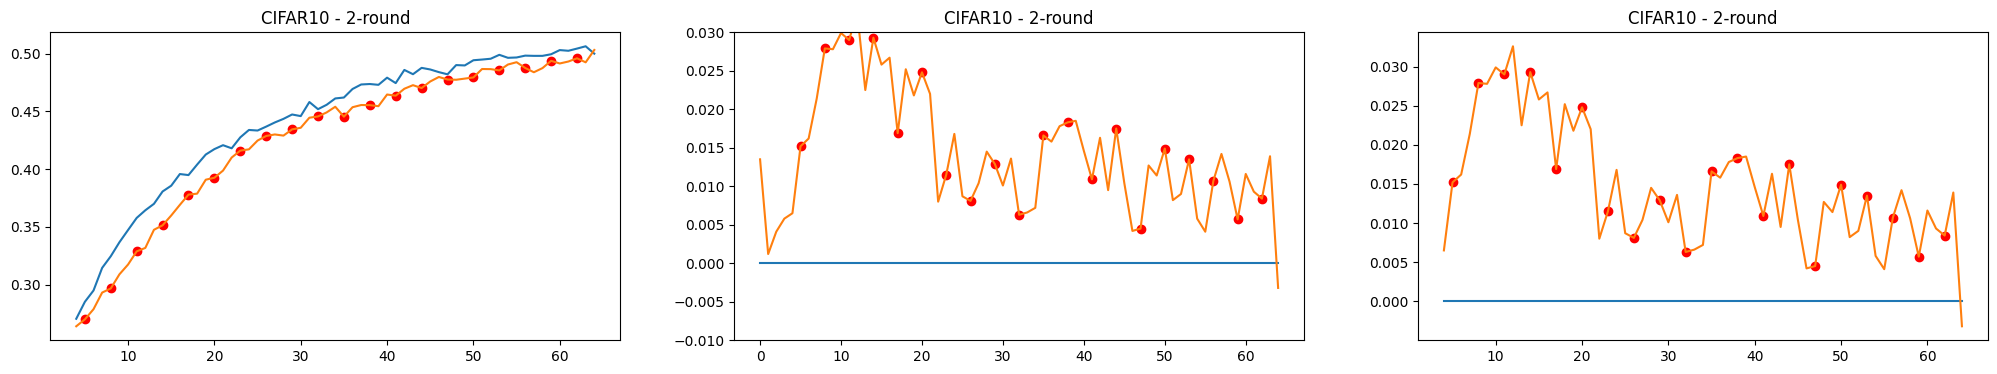

In [56]:
for model in models:
    analize(f'./t4/{model}', model, models[model])

['C4-E3-B256-T60-DSEQ-L-S-6-4-CIFAR10-out.csv', 'A-C4-E3-B256-T60-DSEQ-L-T-E-0-0-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-2-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-S-8-CIFAR10-out.csv']


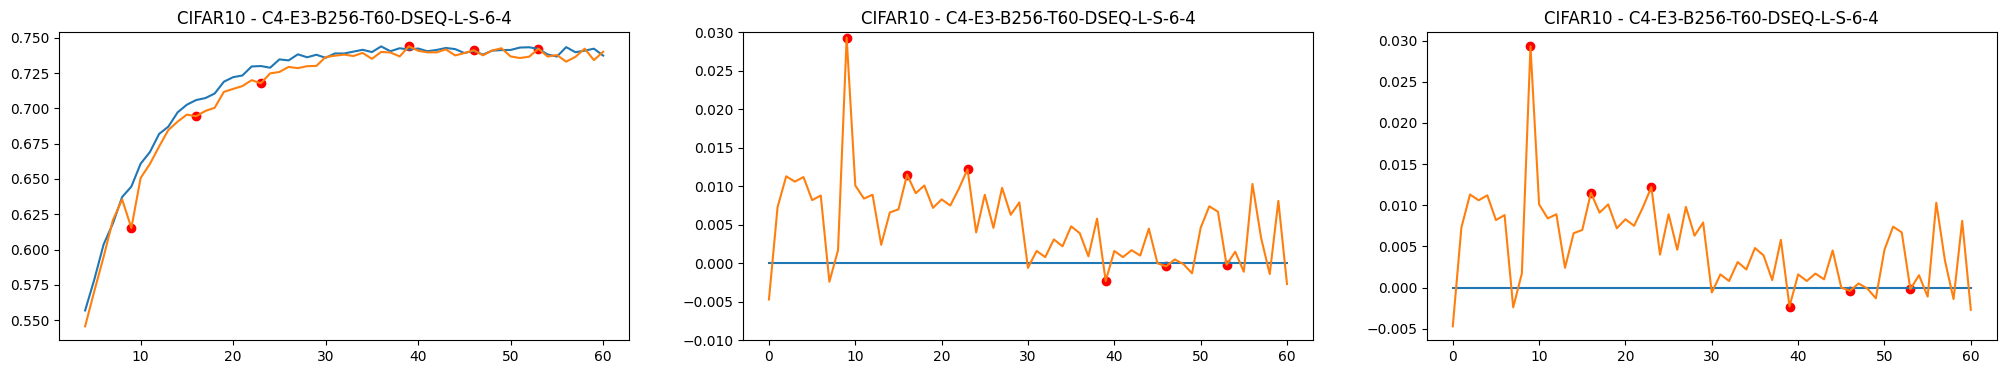

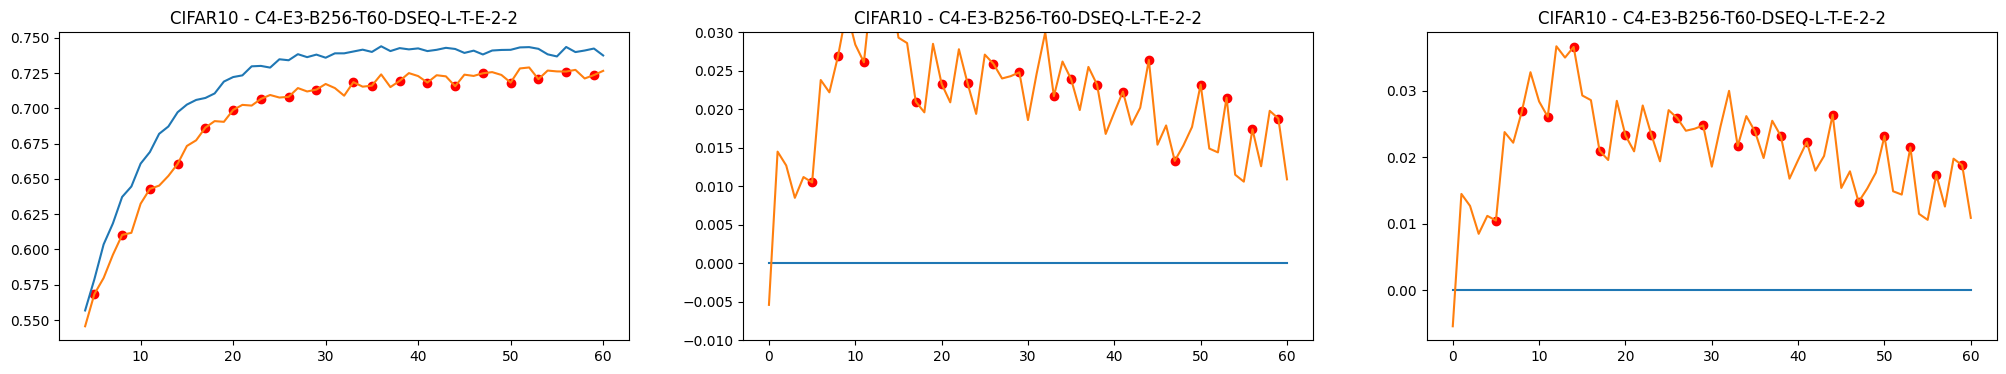

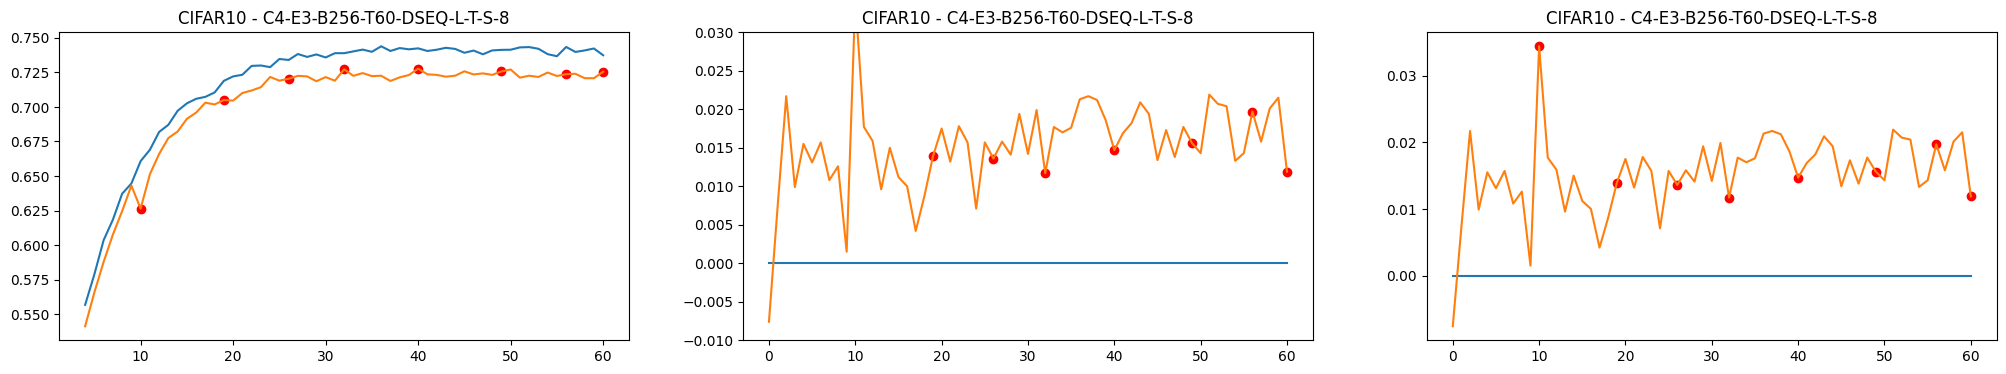

In [52]:
data_files = os.listdir(f"./t3/")
data_files = [f for f in data_files if f.endswith(".csv")]
print(data_files)

analize(f"./t3/", "CIFAR10", data_files)

['C4-E3-B256-T60-DSEQ-L-S-6-4-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-1-CIFAR10-out.csv', 'A-C4-E3-B256-T60-DSEQ-L-T-E-0-0-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-2_v2-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-2-CIFAR10-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-S-8-CIFAR10-out.csv']


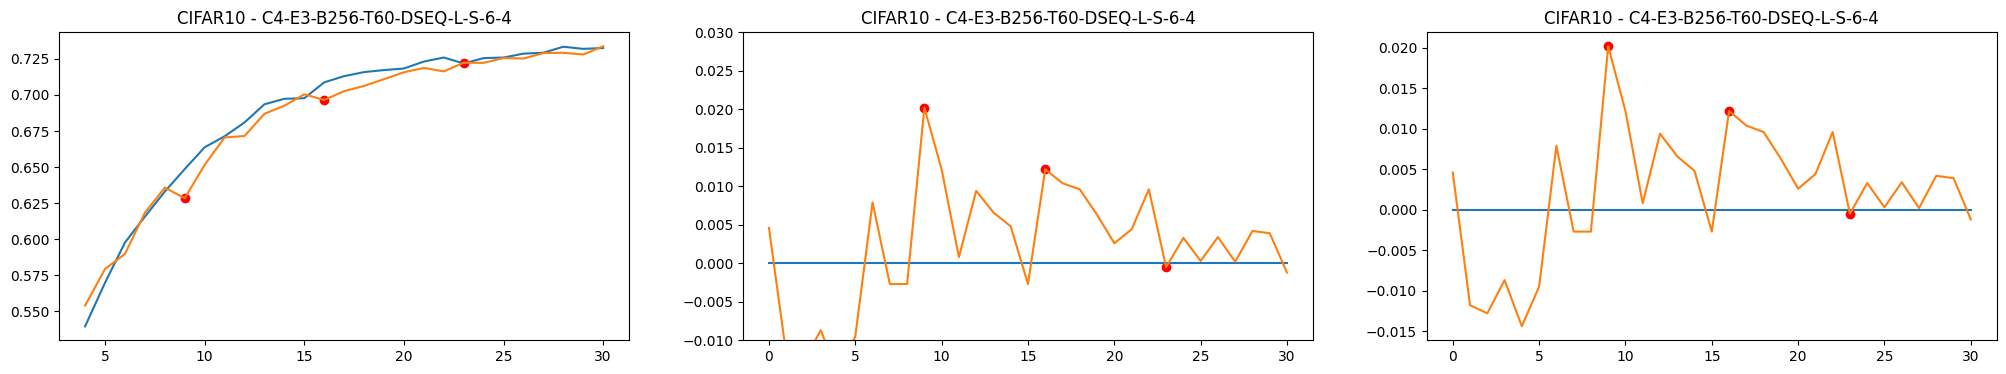

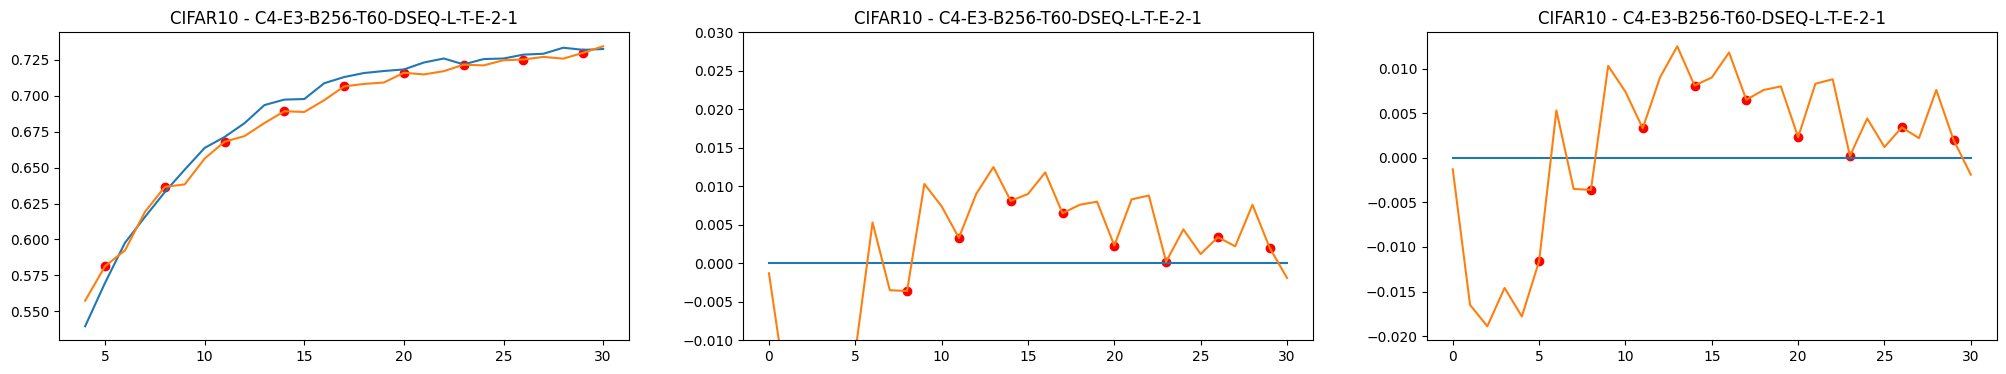

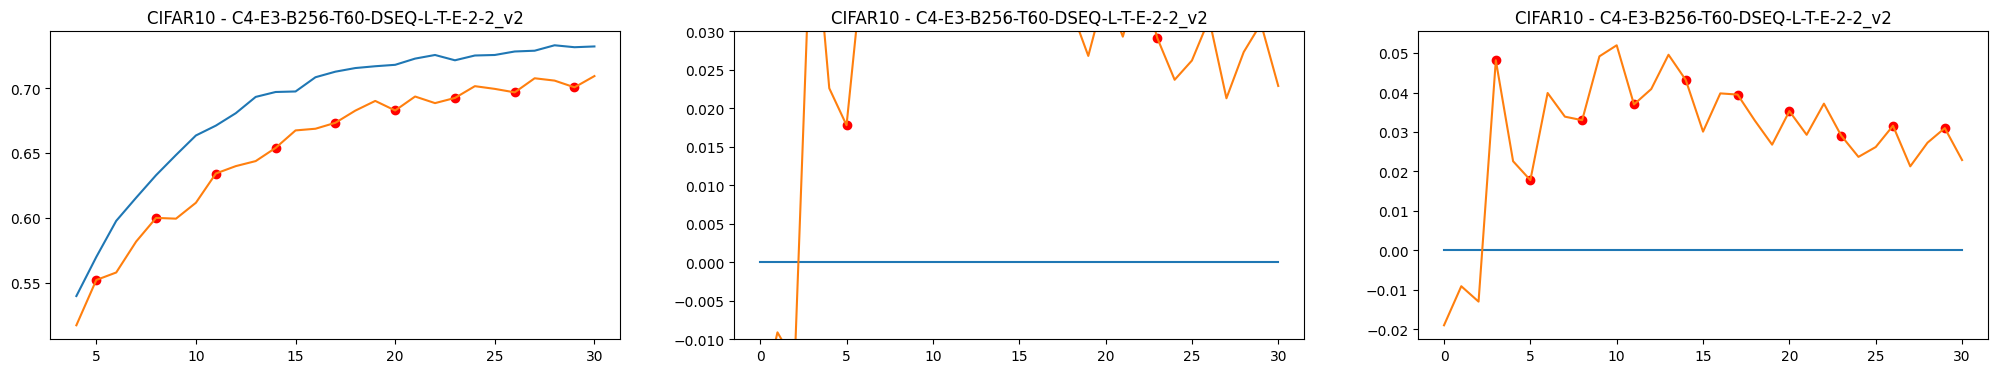

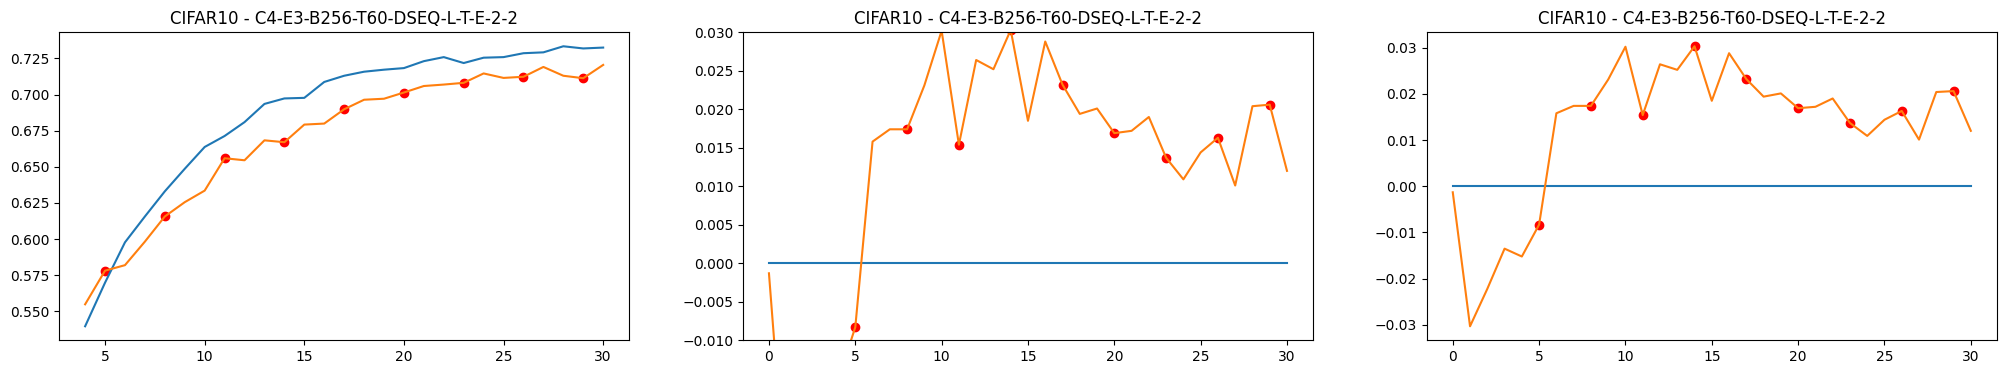

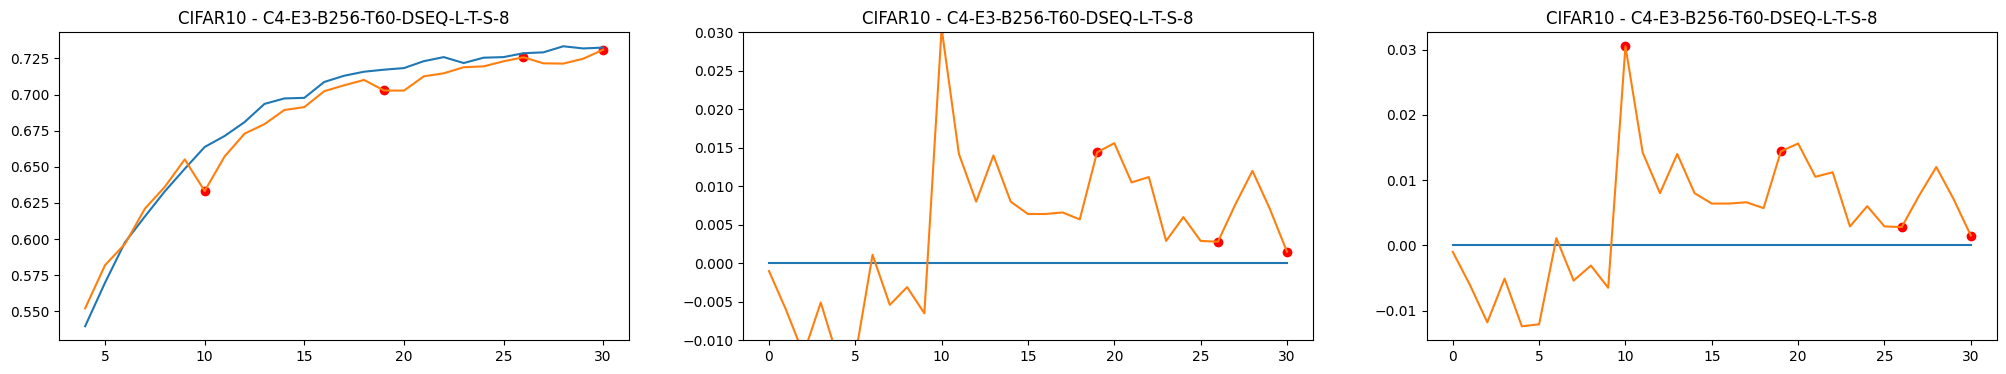

In [53]:
data_files = os.listdir(f"./t2/")
data_files = [f for f in data_files if f.endswith(".csv")]
print(data_files)

analize(f"./t2/", "CIFAR10", data_files)

['C4-E3-B256-T60-DSEQ-L-T-E-2-2-MNIST-out.csv', 'A-C4-E3-B256-T60-DSEQ-L-T-E-0-0-MNIST-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-1-MNIST-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-E-2-2_v2-MNIST-out.csv', 'C4-E3-B256-T60-DSEQ-L-T-S-8-MNIST-out.csv', 'C4-E3-B256-T60-DSEQ-L-S-6-4-MNIST-out.csv']


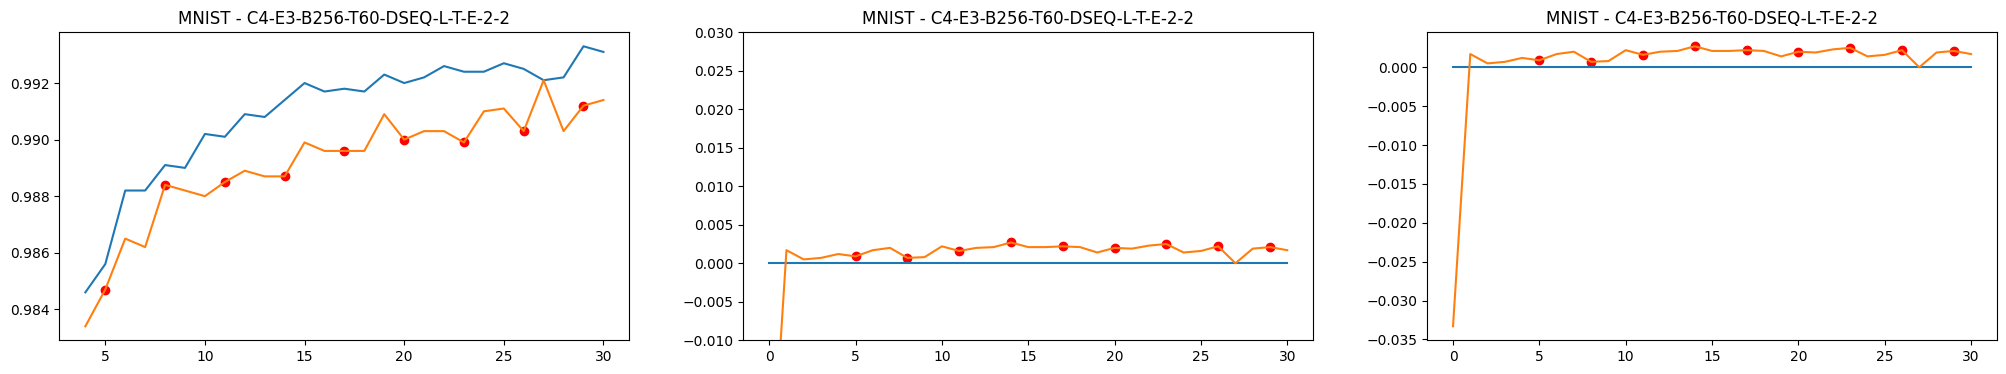

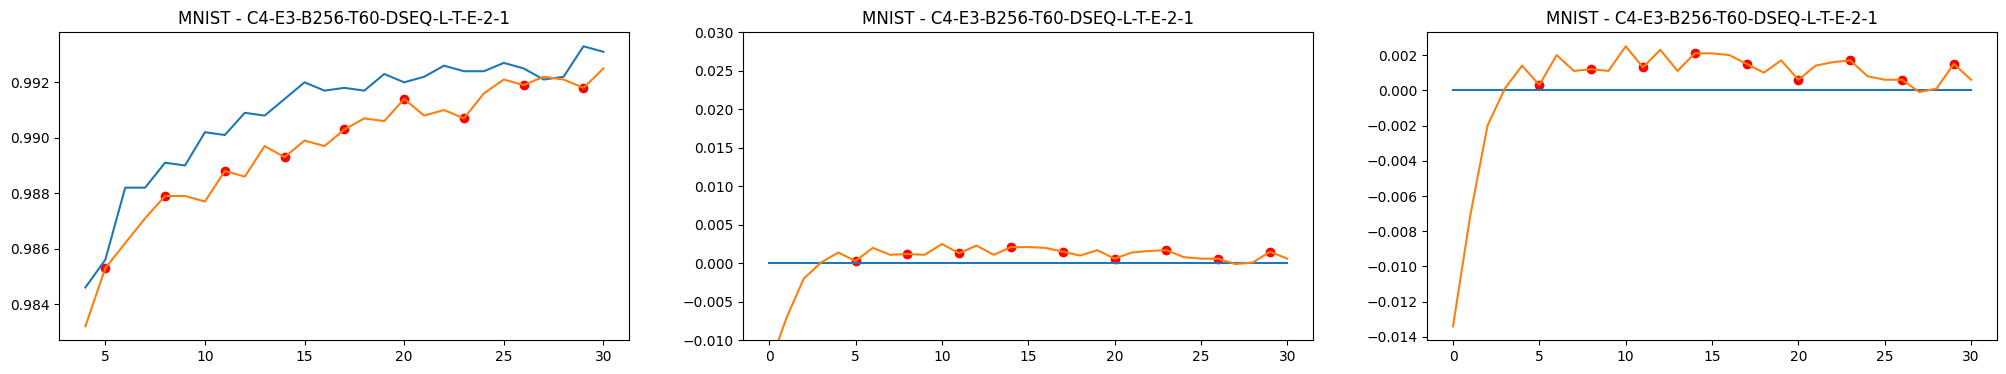

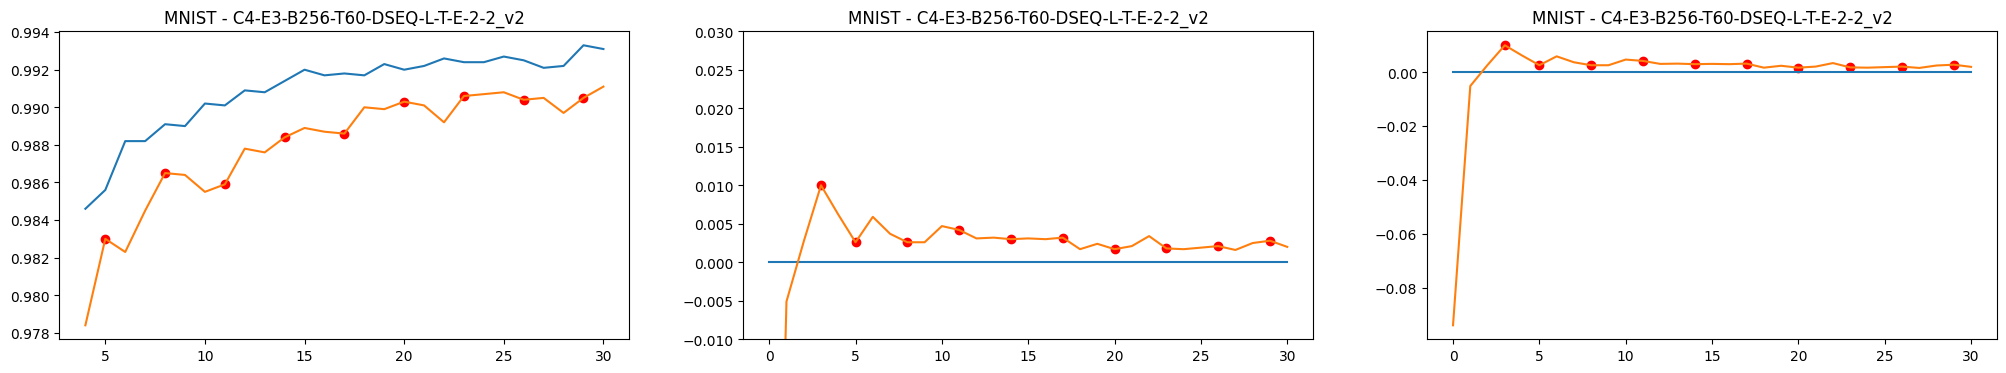

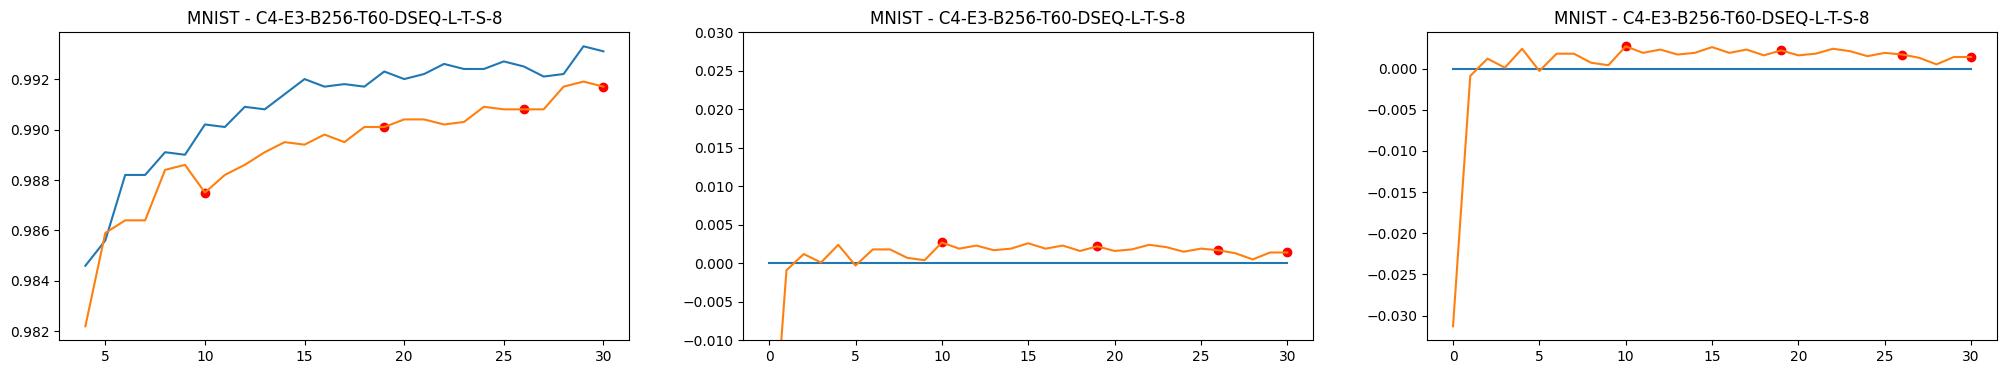

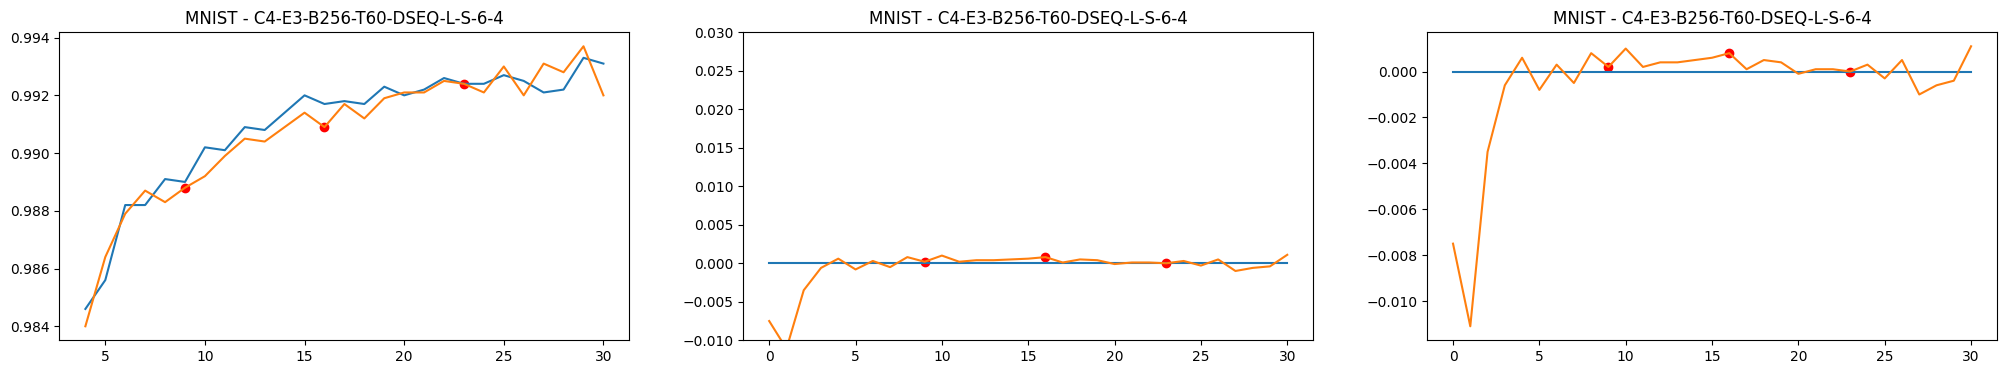

In [54]:
data_files = os.listdir(f"./t1/")
data_files = [f for f in data_files if f.endswith(".csv")]
print(data_files)

analize(f"./t1/", "MNIST", data_files)